In [127]:
#Loading libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [122]:
#Import data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Correlation

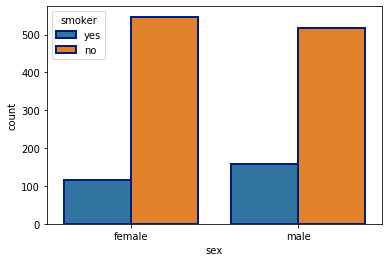

In [123]:
#sex based total smoker
sb.countplot(x='sex',data=df,hue='smoker',linewidth=2,edgecolor=sb.color_palette("dark", 1))

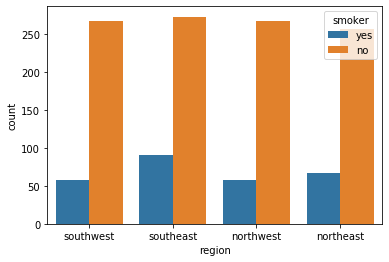

In [133]:
#area based total smoker
sb.countplot(data=df, x='region',hue='smoker')

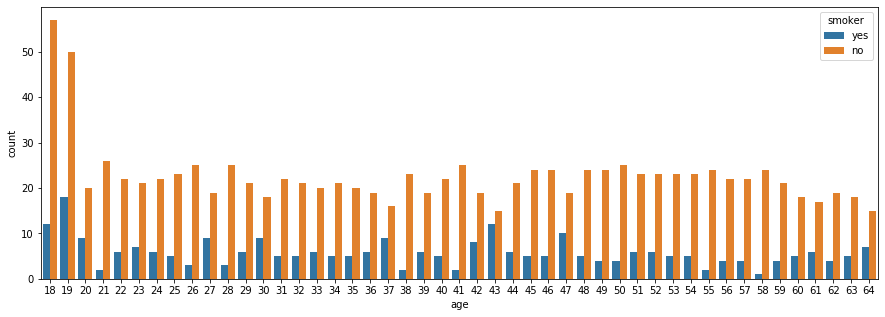

In [147]:
#age based total smoker
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='age',hue='smoker')

### Encoding the dataframe

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
#Encoding all column in a single shot using pandas
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    df[column] = le.fit_transform(df[column])

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
#summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [7]:
#unique values of a column
df.smoker.unique()

array([1, 0])

In [8]:
#count value type
df.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [9]:
#smoker percentage
smoker_percentage = (274/(1064+274))*100
smoker_percentage

20.47832585949178

In [62]:
#Drop all rows with null values
#df.dropna(inplace=True)

x = df.drop('smoker',axis=1)
y = df['smoker']

## Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [63]:
dtc.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

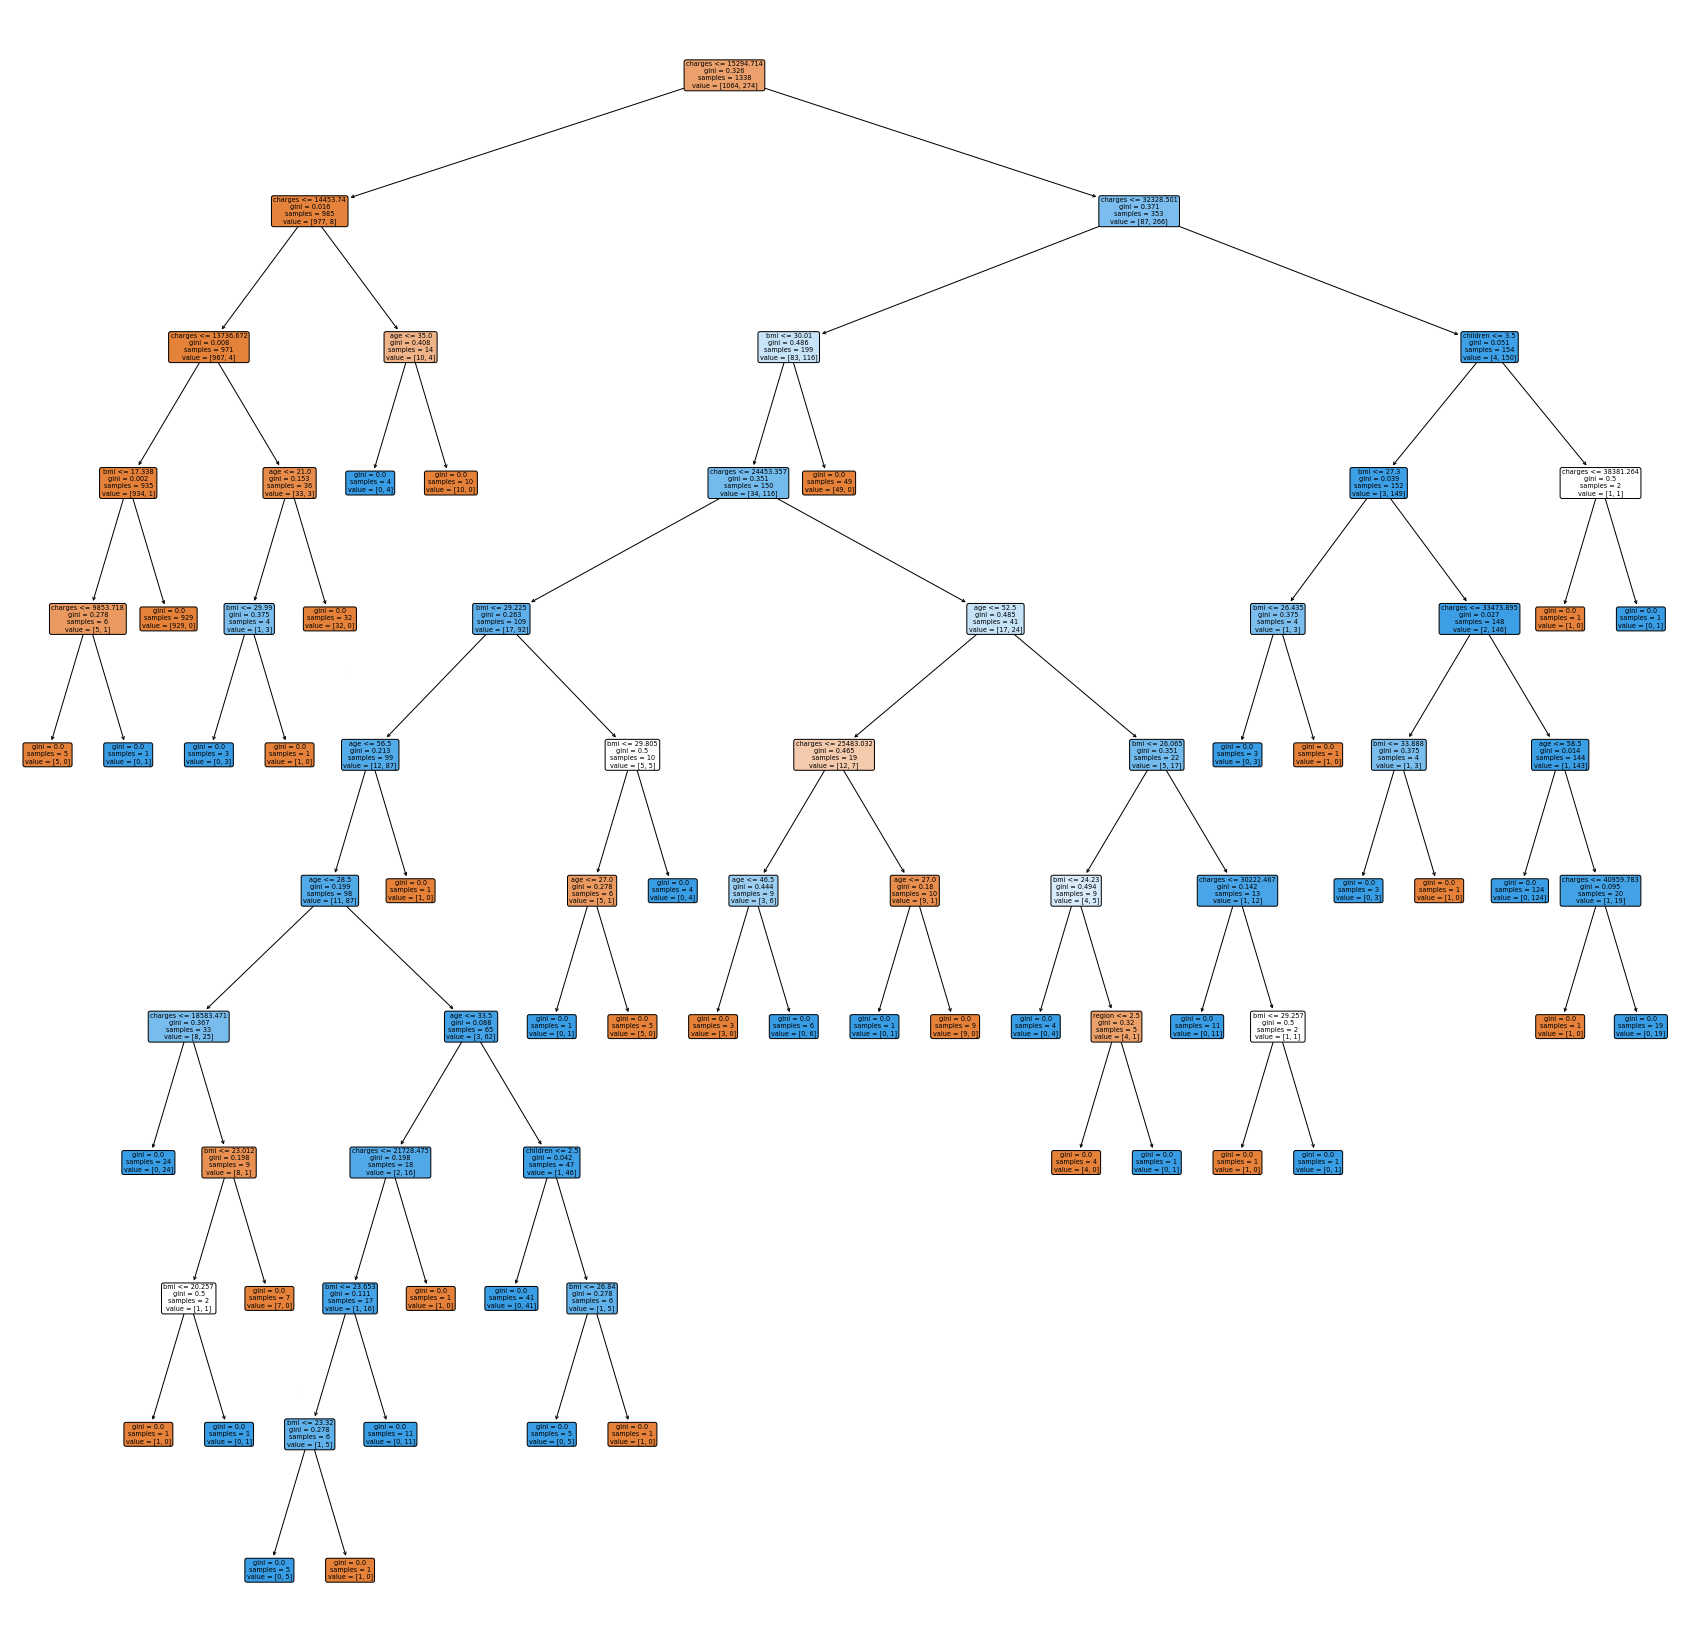

In [148]:
from sklearn import tree

#set figure size
plt.figure(figsize=(30,30))

#plot decision tree
tree.plot_tree(dtc,filled=True,rounded = True,feature_names = x.columns)

#save current figure
plt.savefig("decision_tree.png")

In [65]:
#plotting tree in stream
print(tree.export_text(dtc,show_weights = True,feature_names=list(x.columns)))

|--- charges <= 15294.71
|   |--- charges <= 14453.74
|   |   |--- charges <= 13736.67
|   |   |   |--- bmi <= 17.34
|   |   |   |   |--- charges <= 9853.72
|   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |--- charges >  9853.72
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- bmi >  17.34
|   |   |   |   |--- weights: [929.00, 0.00] class: 0
|   |   |--- charges >  13736.67
|   |   |   |--- age <= 21.00
|   |   |   |   |--- bmi <= 29.99
|   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |--- bmi >  29.99
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- age >  21.00
|   |   |   |   |--- weights: [32.00, 0.00] class: 0
|   |--- charges >  14453.74
|   |   |--- age <= 35.00
|   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |--- age >  35.00
|   |   |   |--- weights: [10.00, 0.00] class: 0
|--- charges >  15294.71
|   |--- charges <= 32328.50
|   |   |--- bmi <= 30.01
|   |   |   |--- charge

In [66]:
from sklearn.model_selection import train_test_split

#Split into random train and test subsets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=42) 

In [67]:
xtrain.shape

(936, 6)

In [68]:
xtest.shape

(402, 6)

In [69]:
y.index

RangeIndex(start=0, stop=1338, step=1)

In [70]:
#independent features
x.columns

Index(['age', 'sex', 'bmi', 'children', 'region', 'charges'], dtype='object')

In [149]:
#dependent feature - on x
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int32

In [74]:
#predict for testing dataset
pred = dtc.predict(xtest)

In [75]:
#predicted values for testing data
pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [76]:
#actual values for testing data
np.array(ytest)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

## Performance Measurement (on Classification)

### Confusion Matrix

In [157]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(ytest,pred)
cmatrix

array([[323,   0],
       [  0,  79]], dtype=int64)

In [158]:
tp,fn,fp,tn = cmatrix.reshape(-1)

In [159]:
tp

323

In [160]:
fn

0

In [161]:
fp

0

In [162]:
tn

79

### Accuracy

In [86]:
from sklearn.metrics import classification_report,plot_roc_curve,accuracy_score

In [45]:
(tp+tn)/len(ytest)

1.0

In [79]:
dtc.score(xtest,ytest)

1.0

In [153]:
accuracy_score(ytest,pred)

1.0

Text(33.0, 0.5, 'Actual value')

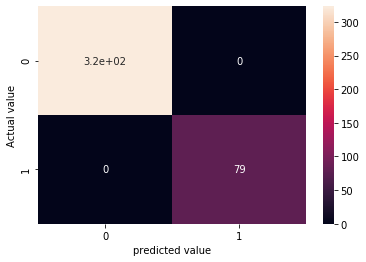

In [82]:
sb.heatmap(cmatrix,annot=True)
plt.xlabel('predicted value')
plt.ylabel('Actual value')

### Classification Report

In [88]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00        79

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



### Precision / Positive Predictive Value (PPV)

In [98]:
ppv = tp / (tp+fp)
ppv

1.0

### Sensitivity / Recall / Hit Rate / True Positive Rate (TPR)

In [99]:
tpr = tp / (tp+fn)
tpr

1.0

### False Positive Rate(FPR) / 1-Specificity

In [97]:
fp/(fp+tn)

0.0

### F1 Measure

In [101]:
(ppv + tpr) / 2

1.0

### F1 score / Harmonic Mean

In [105]:
(2 * ppv * tpr) / (ppv + tpr)

1.0

### Specificity / Selectivity / True Negative Rate (TNR)

In [109]:
tnr = tn / (tn + fp)
tnr

1.0

### Threat Score / Critical Success Index (CSI)

In [106]:
tp / (tp + fp + fn)

1.0

### False Discovery Rate (FDR)

In [107]:
fp / (tp + fp)

0.0

### Balanced Accuracy (BA)

In [110]:
(tpr + tnr) / 2

1.0

### Informadness / Bookmaker Informadness (BM)

In [111]:
tpr +tnr -1

1.0

### Negative Predictive Value (NPV)

In [113]:
npv = tn / (tn + fn)
npv

1.0

### Markedness (MK) / delta-p

In [114]:
ppv + npv -1

1.0

### AuC(Area Under Curve) & RoC(Receiver Operating Characteristics) graph

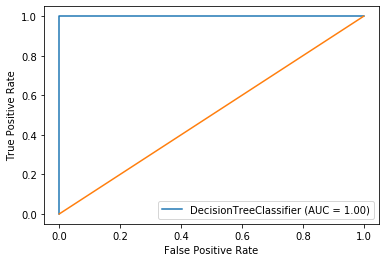

In [92]:
plot_roc_curve(dtc,xtest,ytest)
plt.plot([0,1],[0,1])